In [1]:
import numpy as np
from TDD.TDD2 import Ini_TDD,Clear_TDD,set_index_order,get_tdd,to_cnf2
from TDD.TDD_Q2 import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q2 import reshape as reshape2
from TDD.TN2 import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

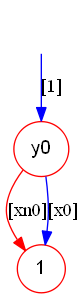

In [2]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()
# ts2=Tensor(U,var)

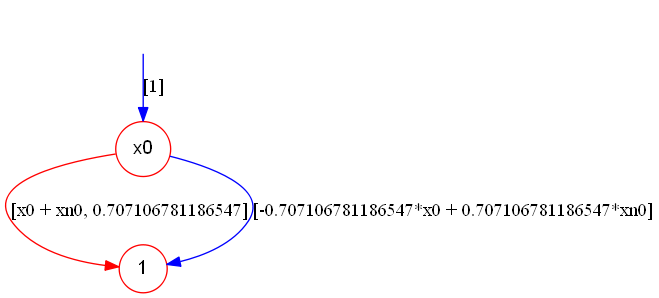

In [8]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()
# Clear_TDD()

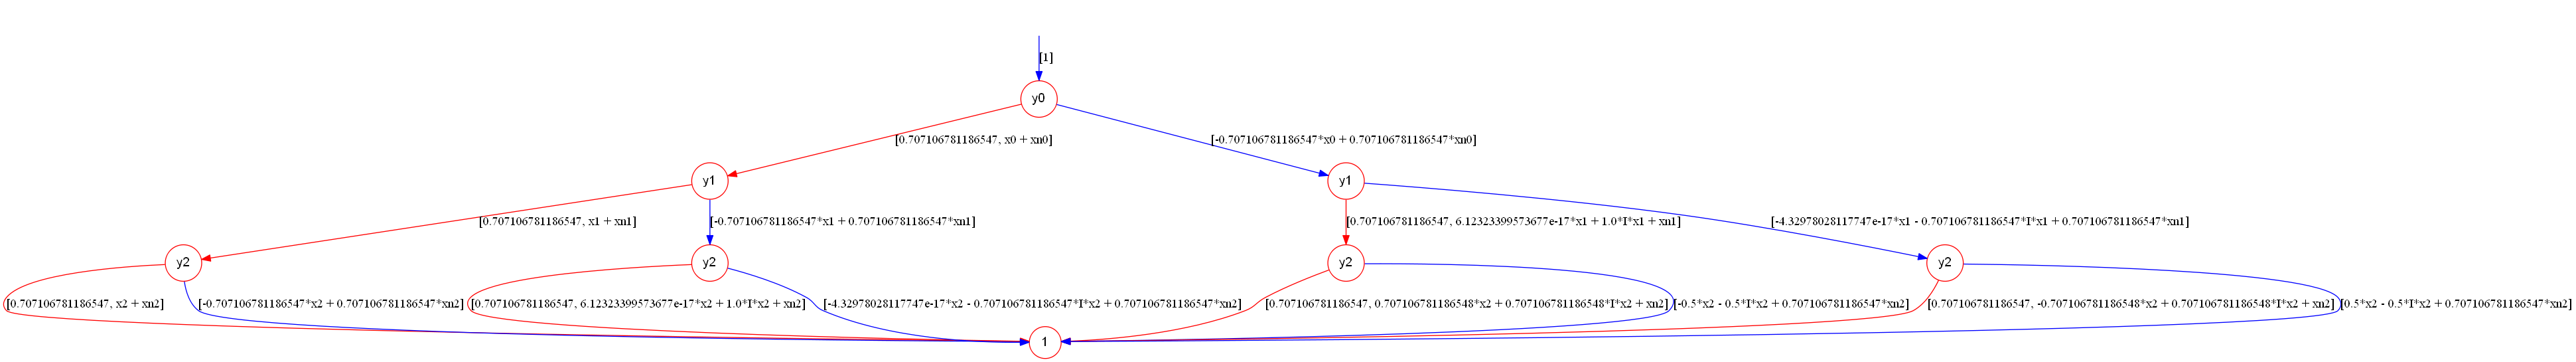

In [4]:
path='Benchmarks/'
file_name='qft_3.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(3):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)
tdd=tn.cont()
tdd.show()

In [5]:
x=symbols('x1')
nx=symbols('xn1')
y=symbols('x2')
ny=symbols('xn2')
s=2*x+3*nx+2*x*y+3*nx*y+2*x*ny+3*nx*ny
print(s)
t=to_cnf2(s,n=2)
print(t)

2*x1*x2 + 2*x1*xn2 + 2*x1 + 3*x2*xn1 + 3*xn1*xn2 + 3*xn1
[2*x1 + 3*xn1, x2 + xn2 + 1]


In [6]:
s=x*2+x*y
print(s)
print(to_cnf2(s))

x1*x2 + 2*x1
[x1, x2 + 2]


In [7]:
# 2*~x

TypeError: unsupported operand type(s) for *: 'int' and 'Not'